In [1]:
!pip install dmol-book

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.5/250.5 KB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 KB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import sklearn
from sklearn import metrics
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

##acquire data
data = pd.read_csv(
    "gdrive/MyDrive/dataset/CSD_EES_DB.csv"
)
data.head()

Mounted at /content/gdrive


,ID,doi,formula,NAts,SMILES,HOMO,LUMO,E(S1),f(S1),E(S2),f(S2),E(S3),f(S3),E(T1),E(T2),E(T3)
0,AACFAZ10,10.1107/S0108270183005156,C26 H22 Cl2 N2 O6,36.0,COC1=C(C(OC1=O)c1ccccc1Cl)C(C)=NN=C(C)C1=C(OC)...,-7.548438,-1.912144,3.1382,0.0027,3.8297,1.1448,4.5310,0.0000,2.2270,2.8977,3.0885
1,ABACIR,10.1107/S160053681103861X,C17 H21 N3 O4 S2,26.0,O=N(=O)c1ccccc1NCC1=CSC(=C1)S(=O)(=O)NC1CCCCC1,-7.675787,-1.725202,3.6720,0.0982,3.7456,0.0888,4.1316,0.0016,2.3255,2.8794,3.2735
2,ABADEO,10.1107/S1600536811039158,C30 H28 N6 O2,38.0,CN1N(c2ccccc2)C(=O)C(=C1C)N=Cc1ccccc1C=NC1=C(C...,-6.603659,-0.762191,3.9027,0.7900,4.0170,0.2765,4.1450,0.0455,2.6892,3.0039,3.5964
3,ABADUE,10.1107/S1600536811039110,C17 H17 N1 O4,22.0,COc1cc(OC)c(C=CC(=O)c2ccccn2)c(OC)c1,-6.790057,-0.969814,3.3127,0.0001,3.9203,0.7088,4.6824,0.0265,2.5848,2.9294,3.9060
4,ABAGAN,10.1107/S1600536811038177,C26 H17 O1 P1,28.0,O=P1(c2ccccc2)c2ccc3ccccc3c2c2c3ccccc3ccc12,-7.067613,-1.419890,3.6197,0.1814,4.2742,0.0073,4.4154,0.0007,2.5192,3.2095,3.8388


In [3]:
## reordering HOMO and LUMO columns
cols = list(data.columns)
a, b = cols.index('HOMO'), cols.index('LUMO')
cols[b], cols[a] = cols[a], cols[b]
data = data[cols]

data

train_proportion = 0.9
train_data = data[:int(0.9*len(data))]
test_data = data[int(0.9*len(data)):]

features_start_at = list(train_data.columns).index("HOMO")
feature_names = train_data.columns[ features_start_at:]
f = train_data.loc[:, feature_names].values
fmean = np.mean(f, axis=0)
fstd = np.std(f, axis=0)
features = ((f - fmean) / fstd)

g = test_data.loc[:, feature_names].values
gmean = np.mean(g, axis=0)
gstd = np.std(g, axis=0)
test_features = ((g - gmean) / gstd)

labels = train_data.LUMO.values
test_labels = test_data.LUMO.values



In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer="SGD", loss="mean_absolute_error")

In [5]:
model.fit(features, labels, epochs=50)

Epoch 1/50
1356/1356 [==============================] - 4s 2ms/step - loss: 0.2688
Epoch 2/50
1356/1356 [==============================] - 3s 2ms/step - loss: 0.2140
Epoch 3/50
1356/1356 [==============================] - 5s 4ms/step - loss: 0.2048
Epoch 4/50
1356/1356 [==============================] - 6s 5ms/step - loss: 0.1988
Epoch 5/50
1356/1356 [==============================] - 2s 2ms/step - loss: 0.1937
Epoch 6/50
1356/1356 [==============================] - 2s 2ms/step - loss: 0.1892
Epoch 7/50
1356/1356 [==============================] - 2s 2ms/step - loss: 0.1855
Epoch 8/50
1356/1356 [==============================] - 2s 2ms/step - loss: 0.1822
Epoch 9/50
1356/1356 [==============================] - 4s 3ms/step - loss: 0.1804
Epoch 10/50
1356/1356 [==============================] - 3s 2ms/step - loss: 0.1787
Epoch 11/50
1356/1356 [==============================] - 2s 2ms/step - loss: 0.1775
Epoch 12/50
1356/1356 [==============================] - 2s 2ms/step - loss: 0.1767
E

151/151 [==============================] - 0s 2ms/step


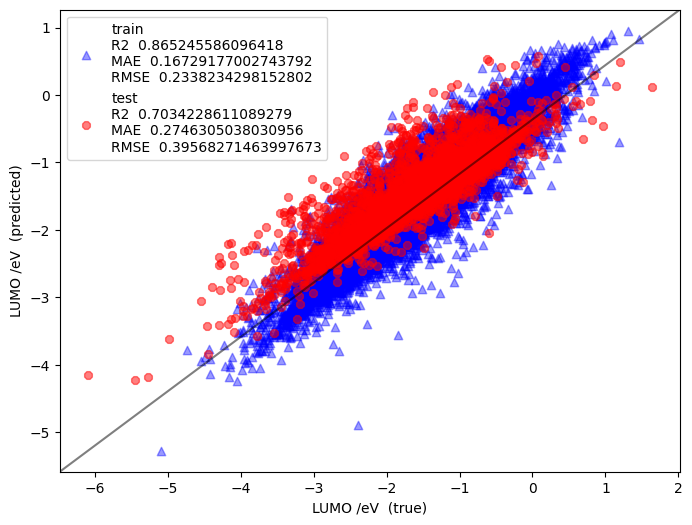

In [6]:
test_predicted_labels = model.predict(test_features)
train_predicted_labels = model(features)

test_metrics = "test\nR2  " + str(sklearn.metrics.r2_score(test_labels, test_predicted_labels))+"\nMAE  "+ str(sklearn.metrics.mean_absolute_error(test_labels, test_predicted_labels))+"\nRMSE  "+ str(sklearn.metrics.mean_squared_error(test_labels, test_predicted_labels, squared=False))
train_metrics = "train\nR2  " + str(sklearn.metrics.r2_score(labels, train_predicted_labels))+"\nMAE  "+ str(sklearn.metrics.mean_absolute_error(labels, train_predicted_labels))+"\nRMSE  "+ str(sklearn.metrics.mean_squared_error(labels, train_predicted_labels, squared=False))
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(labels, train_predicted_labels, c='Blue', label=train_metrics, alpha=0.4, marker='^')
ax1.scatter(test_labels, test_predicted_labels, c='Red', label=test_metrics, alpha=0.5, marker='8')
plt.legend(loc='upper left')
ax1.set_xlabel("LUMO /eV  (true)")
ax1.set_ylabel("LUMO /eV  (predicted)")
ax1.plot([0,1],[0,1], transform=ax1.transAxes, c='Black', alpha=0.5)
fig.set_figwidth(8)
fig.set_figheight(6)

In [16]:
model.predict(features)

1356/1356 [==============================] - 5s 4ms/step


array([[-1.7903459],
       [-1.8610886],
       [-0.9006514],
       ...,
       [-0.2703746],
       [-1.470716 ],
       [-2.4997644]], dtype=float32)

In [17]:
features[0]

array([-0.86747277, -0.48284164, -0.56718178, -0.12895162,  3.60534717,
        0.51981388, -0.50873923, -0.36866202, -0.32235714, -0.80135677])